<a href="https://colab.research.google.com/github/BhagyaKoushik/ML/blob/main/ML_Project_Car_License_Plate_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/MyDrive/CarLicensePlatesPascalVOC.zip' -d '/content/drive/MyDrive/Car License Plates'

Archive:  /content/drive/MyDrive/CarLicensePlatesPascalVOC.zip
   creating: /content/drive/MyDrive/Car License Plates/annotations/
  inflating: /content/drive/MyDrive/Car License Plates/annotations/Cars213.xml  
  inflating: /content/drive/MyDrive/Car License Plates/__MACOSX/annotations/._Cars213.xml  
  inflating: /content/drive/MyDrive/Car License Plates/annotations/Cars207.xml  
  inflating: /content/drive/MyDrive/Car License Plates/__MACOSX/annotations/._Cars207.xml  
  inflating: /content/drive/MyDrive/Car License Plates/annotations/Cars398.xml  
  inflating: /content/drive/MyDrive/Car License Plates/__MACOSX/annotations/._Cars398.xml  
  inflating: /content/drive/MyDrive/Car License Plates/annotations/Cars367.xml  
  inflating: /content/drive/MyDrive/Car License Plates/__MACOSX/annotations/._Cars367.xml  
  inflating: /content/drive/MyDrive/Car License Plates/annotations/Cars401.xml  
  inflating: /content/drive/MyDrive/Car License Plates/__MACOSX/annotations/._Cars401.xml  
  in

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

We create the variable X containing all the images of cars by resizing them to 200 * 200.

In [ ]:
IMAGE_SIZE = 200

In [ ]:
img_dir = "/content/drive/MyDrive/Car License Plates/images" # Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

In [ ]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
path = '/content/drive/MyDrive/Car License Plates/annotations'
text_files = ["/content/drive/MyDrive/Car License Plates/annotations/" + f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [ ]:
resizeannotation("/content/drive/MyDrive/Car License Plates/annotations/Cars147.xml")

[168, 126, 90, 93]

In [ ]:
y[:5]

[[167, 129, 90, 93],
 [131, 129, 67, 103],
 [151, 131, 70, 4],
 [107, 98, 87, 85],
 [120, 146, 83, 134]]

In [ ]:
np.array(X).shape

(433, 200, 200, 3)

In [ ]:
np.array(y).shape

(433, 4)

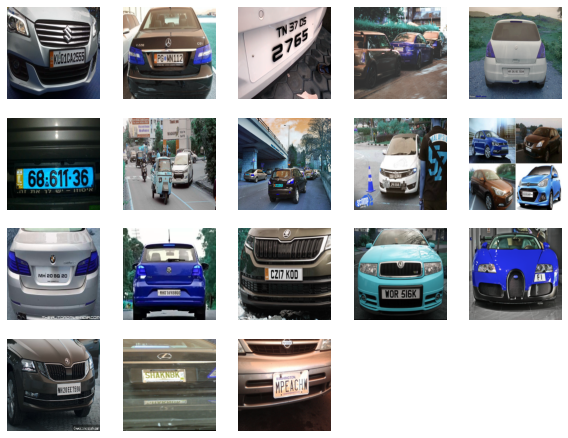

In [ ]:
plt.figure(figsize=(10,20))
for i in range(0,18) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

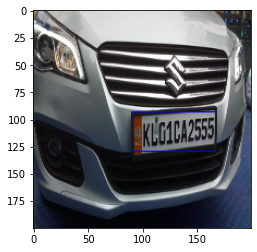

In [ ]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

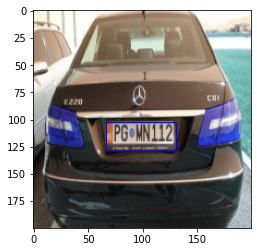

In [ ]:
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

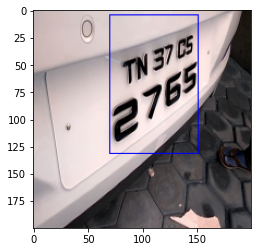

In [ ]:
image = cv2.rectangle(X[2],(y[2][0],y[2][1]),(y[2][2],y[2][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

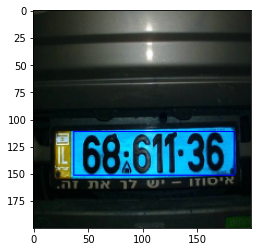

In [ ]:
image = cv2.rectangle(X[5],(y[5][0],y[5][1]),(y[5][2],y[5][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

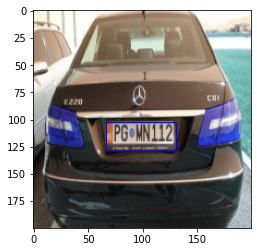

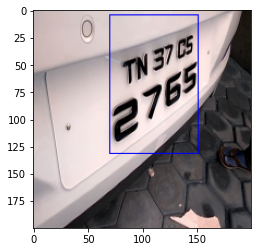

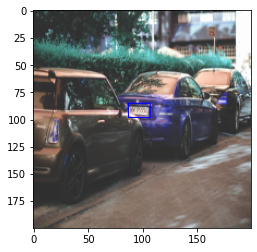

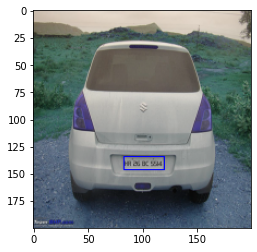

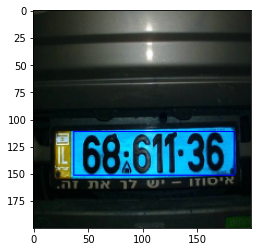

In [ ]:
for i in range(1,6):
  image = cv2.rectangle(X[i],(y[i][0],y[i][1]),(y[i][2],y[i][3]),(0, 0, 255))
  plt.imshow(image)
  plt.show()

In [ ]:
#Transforming in array
X=np.array(X)
y=np.array(y)

In [ ]:
#Renormalisation
X = X / 255
y = y / 255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
X_train.shape

(389, 200, 200, 3)

In [ ]:
X_test.shape

(44, 200, 200, 3)

In [ ]:
y_train.shape

(389, 4)

In [ ]:
y_test.shape

(44, 4)

In [ ]:
from keras.models import Sequential

from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16

In [ ]:
# Create the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 17,099,140
Trainable params: 2,384,452
Non-

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=1)

Epoch 1/20
7/7 [==============================] - 170s 24s/step - loss: 0.0967 - accuracy: 0.2005 - val_loss: 0.0495 - val_accuracy: 0.5909
Epoch 2/20
7/7 [==============================] - 168s 24s/step - loss: 0.0412 - accuracy: 0.4293 - val_loss: 0.0151 - val_accuracy: 0.6364
Epoch 3/20
7/7 [==============================] - 168s 24s/step - loss: 0.0157 - accuracy: 0.4293 - val_loss: 0.0174 - val_accuracy: 0.7955
Epoch 4/20
7/7 [==============================] - 168s 24s/step - loss: 0.0120 - accuracy: 0.6992 - val_loss: 0.0090 - val_accuracy: 0.7273
Epoch 5/20
7/7 [==============================] - 168s 24s/step - loss: 0.0060 - accuracy: 0.8303 - val_loss: 0.0074 - val_accuracy: 0.7955
Epoch 6/20
7/7 [==============================] - 171s 24s/step - loss: 0.0051 - accuracy: 0.7918 - val_loss: 0.0073 - val_accuracy: 0.7500
Epoch 7/20
7/7 [==============================] - 170s 24s/step - loss: 0.0039 - accuracy: 0.8380 - val_loss: 0.0052 - val_accuracy: 0.7727
Epoch 8/20
7/7 [====

In [ ]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 88.64%


In [ ]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Accuracy Scores')
    plt.legend()
    plt.show()

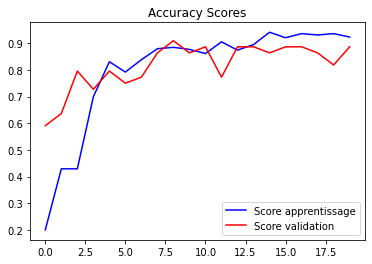

In [ ]:
plot_scores(train)

In [ ]:
def plot_scores(train) :
    loss = train.history['loss']
    val_loss = train.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'b', label='Score apprentissage')
    plt.plot(epochs, val_loss, 'r', label='Score validation')
    plt.title('Loss Scores')
    plt.legend()
    plt.show()

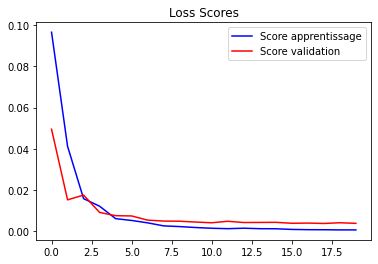

In [ ]:
plot_scores(train)

In [ ]:
 y_cnn = model.predict(X_test)

In [ ]:
y_cnn.shape

(44, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

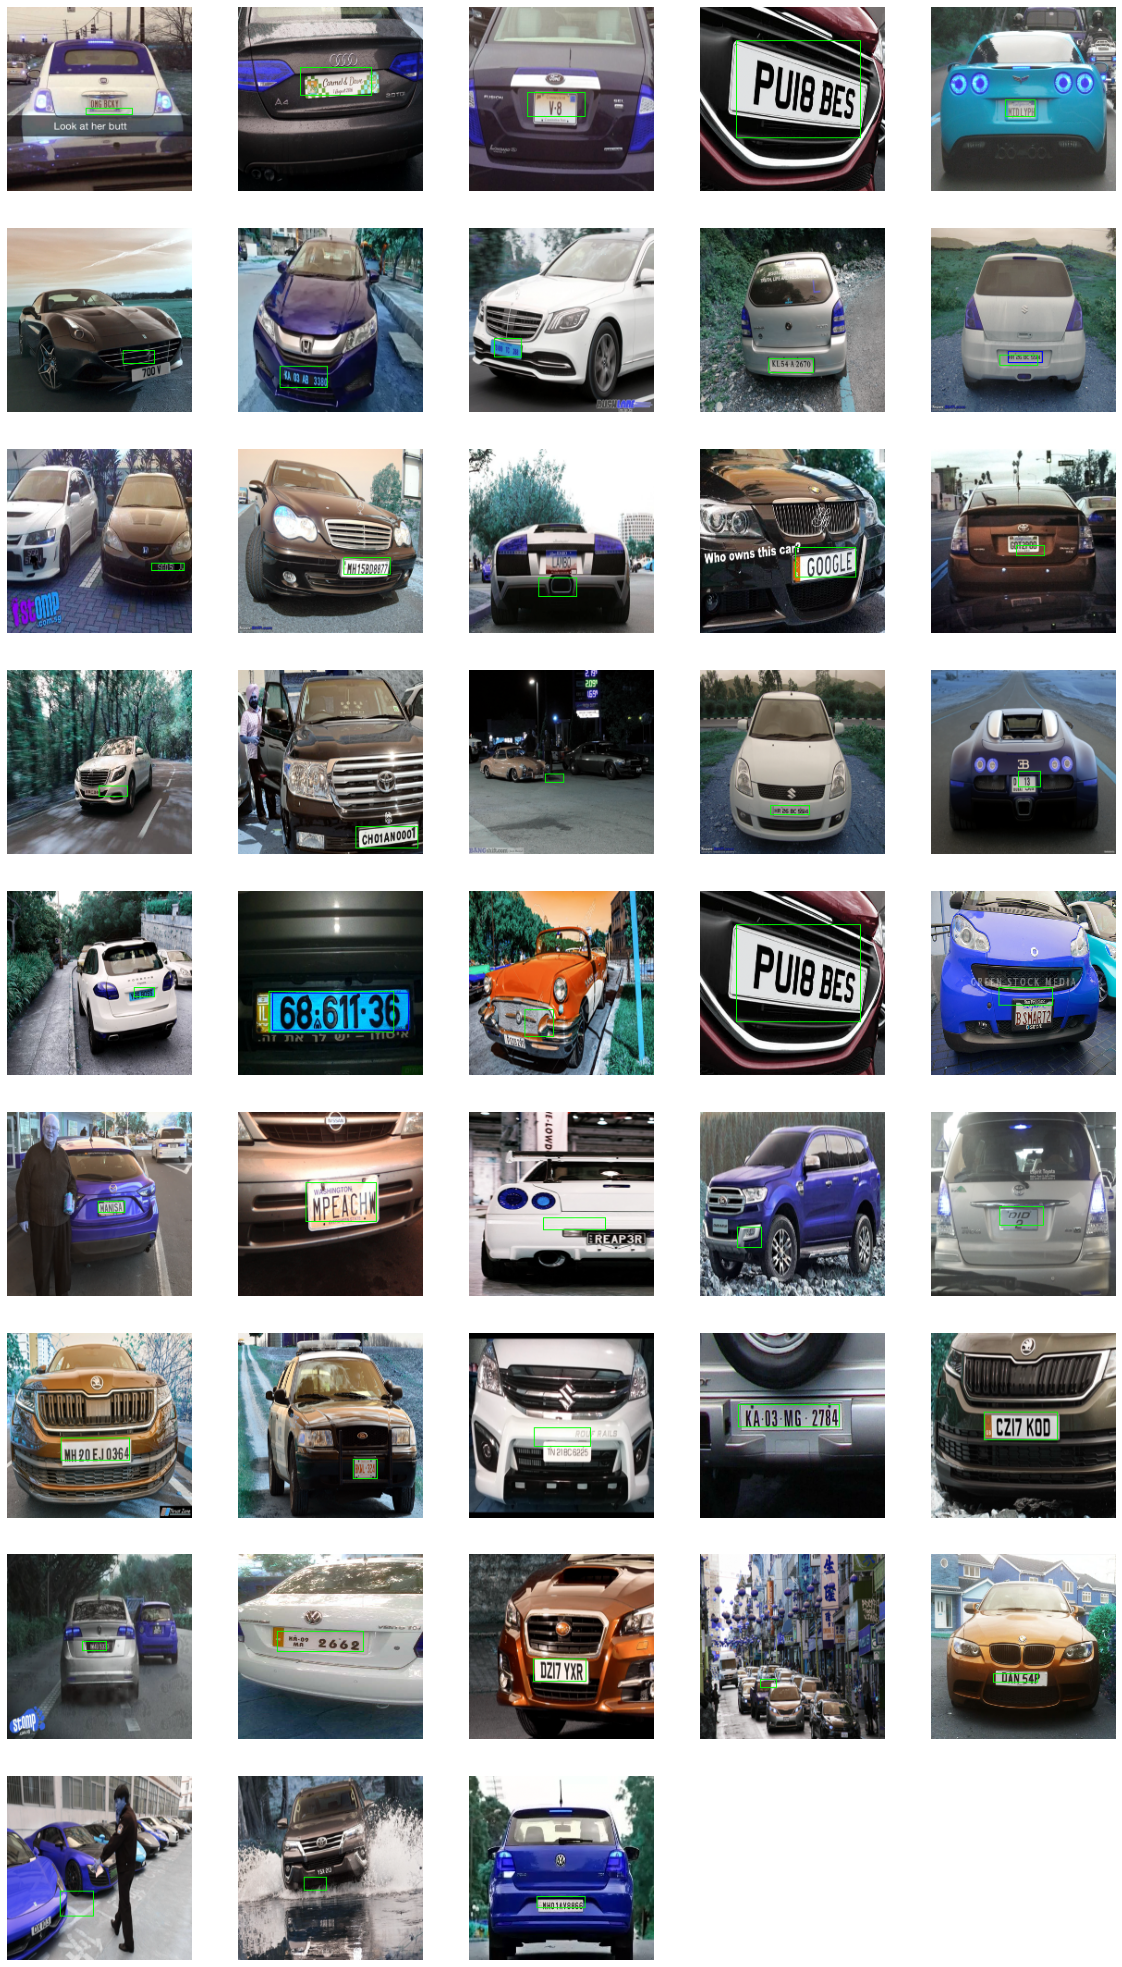

In [ ]:
plt.figure(figsize=(20,40))
for i in range(0,43) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow(image)

In [ ]:
model_json = model.to_json()


In [ ]:
with open("model.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
model_json

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 200, 200, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "vgg16_input"}}, {"class_name": "Functional", "config": {"name": "vgg16", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 200, 200, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "block1_conv1", "trainable": false, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularize

In [ ]:
model.save_weights("model_weights.h5")

In [ ]:
model_json = open('/content/model.json','r')

In [ ]:
loaded_model = model_json.read()

In [ ]:
model_json.close()

In [ ]:
loaded_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 200, 200, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "vgg16_input"}}, {"class_name": "Functional", "config": {"name": "vgg16", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 200, 200, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "block1_conv1", "trainable": false, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularize

In [ ]:
from tensorflow.keras.models import model_from_json
loaded_model = model_from_json(loaded_model)

In [ ]:
loaded_model.load_weights('/content/model_weights.h5')

In [ ]:
loaded_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
loss,accuracy = loaded_model.evaluate(X_test,y_test)

2/2 [==============================] - 18s 5s/step - loss: 0.0871 - accuracy: 0.7727


In [ ]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 77.27%
